In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [2]:
#Load dataset and check head/tail
df = pd.read_csv('S:/NEU/Preparation/EDA/data.csv')
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.tail(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [4]:
#Check datatypes
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [5]:
#Drop irrelevant columns
df = df.drop(['url'], axis=1)
df.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
#Check shape= (rows, columns)
df.shape

(3678, 11)

In [7]:
#Find duplicate values
dup_df = df[df.duplicated()]
print('Number of duplicate rows: ', dup_df.shape)

Number of duplicate rows:  (6, 11)


In [8]:
#Drop duplicate values
df.count()
df = df.drop_duplicates()

In [9]:
df.count()

course_id              3672
course_title           3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

In [10]:
#Drop missing or null values if not that significant or find our reason why they are missing.
print(df.isnull().sum())

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [11]:
"""
Since no null values, we are not dropping the missing values. Procedure to be followed-
df =df.dropna()
print(df.isnull().sum())
"""

'\nSince no null values, we are not dropping the missing values. Procedure to be followed-\ndf =df.dropna()\nprint(df.isnull().sum())\n'

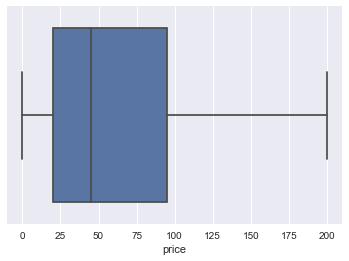

In [14]:
#Trying to find out outliers using boxplots
sns.boxplot(x=df['price'])

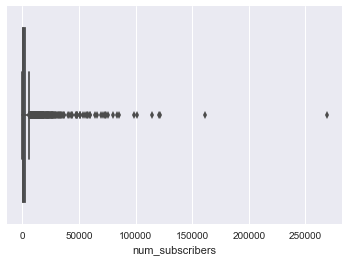

In [15]:
#We can see that there are few courses with abnormally high subscribers.
sns.boxplot(x=df['num_subscribers'])

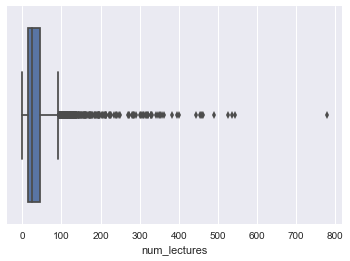

In [16]:
sns.boxplot(x=df['num_lectures'])

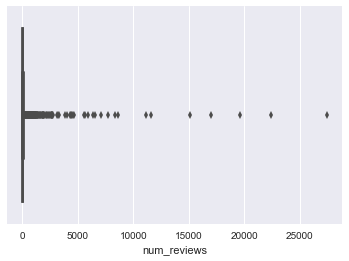

In [17]:
sns.boxplot(x=df['num_reviews'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

course_id           553052.5
is_paid                  0.0
price                   75.0
num_subscribers       2437.0
num_reviews             63.0
num_lectures            31.0
content_duration         3.5
dtype: float64


In [20]:
"""
Follow this for removing outliers
df1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df1.shape
"""

'\nFollow this for removing outliers\ndf1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]\ndf1.shape\n'

In [22]:
#To know more about your data
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [23]:
#Plot histograms(feature vs frequency)
df.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Text(0,0.5,'Number of courses')

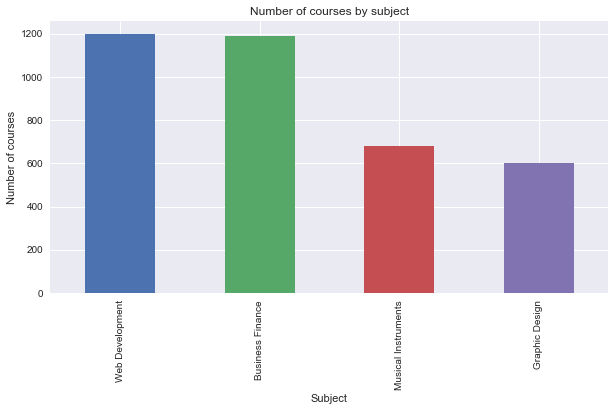

In [28]:
#Subject wise count
df.subject.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of courses by subject')
plt.xlabel('Subject')
plt.ylabel('Number of courses')

Text(0,0.5,'Number of courses')

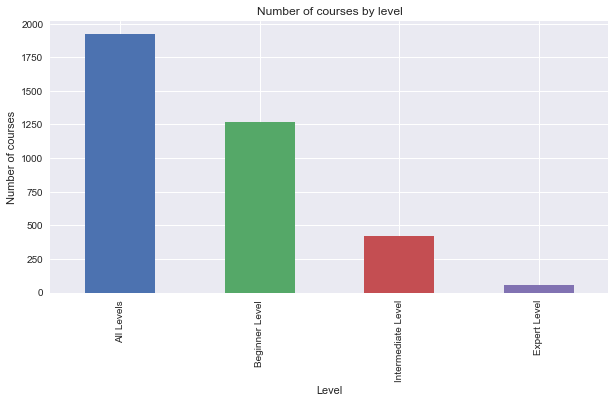

In [29]:
#Level wise count
df.level.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of courses by level')
plt.xlabel('Level')
plt.ylabel('Number of courses')

Text(0,0.5,'Number of courses')

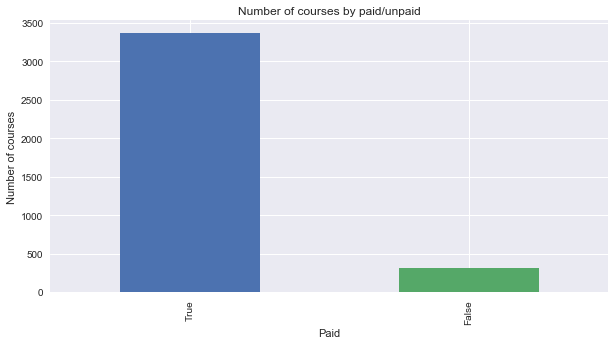

In [30]:
#Paid/Unpaid wise count
df.is_paid.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of courses by paid/unpaid')
plt.xlabel('Paid')
plt.ylabel('Number of courses')

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013765,0.143062,-0.166094,-0.058310,-0.024735,-0.057236
is_paid,-0.013765,1.000000,0.328910,-0.267056,-0.087445,0.112788,0.094594
price,0.143062,0.328910,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,-0.166094,-0.267056,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,-0.058310,-0.087445,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,-0.024735,0.112788,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,-0.057236,0.094594,0.293200,0.162118,0.228852,0.801624,1.000000


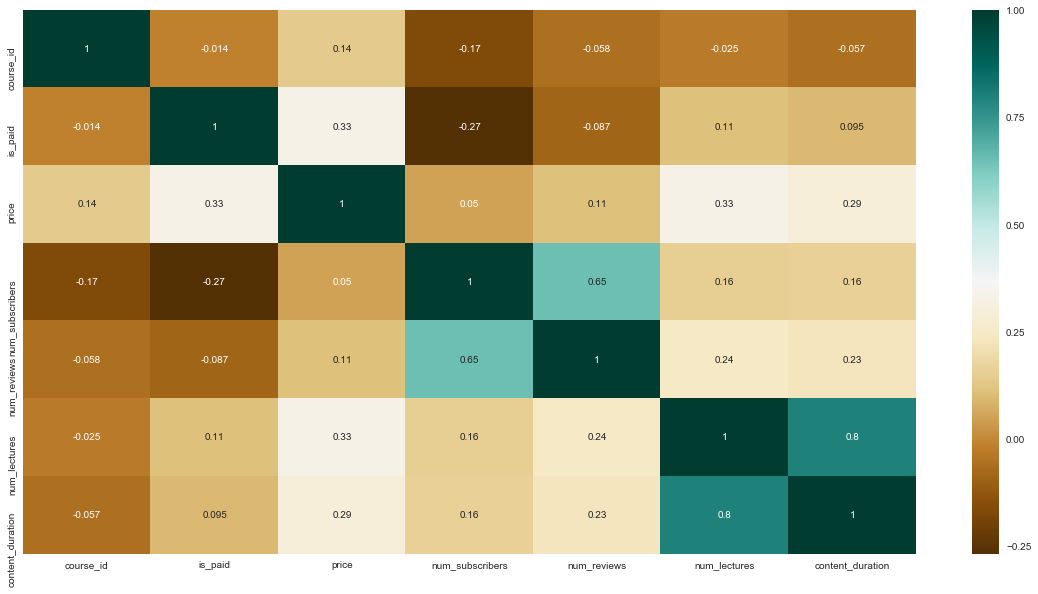

In [31]:
#Plotting heamap to identify any dependant variable
#I have a hypothesis that sunscribers and reviwers are correlated and subscribers and num_lectures are correlated
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

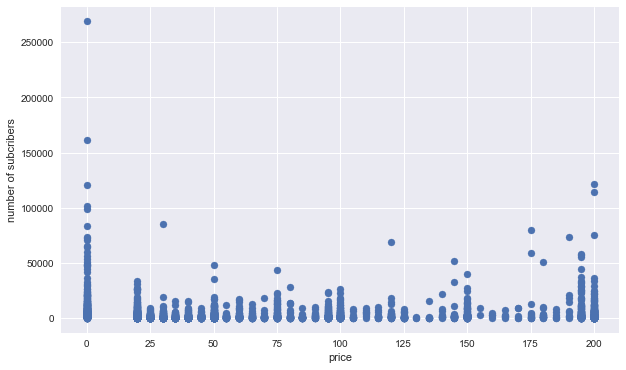

In [32]:
#Plotting scatter plot based on my hypothesis that price and number of subscribers are related
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['num_subscribers'])
ax.set_xlabel('price')
ax.set_ylabel('number of subcribers')
plt.show()

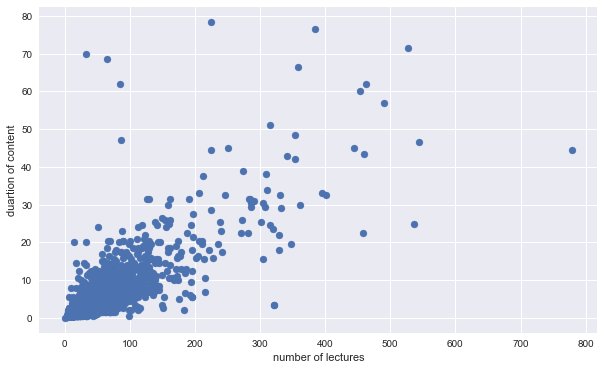

In [33]:
#Hypothesis is wrong, lets try different scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['num_lectures'], df['content_duration'])
ax.set_xlabel('number of lectures')
ax.set_ylabel('duartion of content')
plt.show()